In [66]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [67]:

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

# Part I : EDA - Exploratory Data Analysis

In [68]:
data = pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
data.shape

(768, 9)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


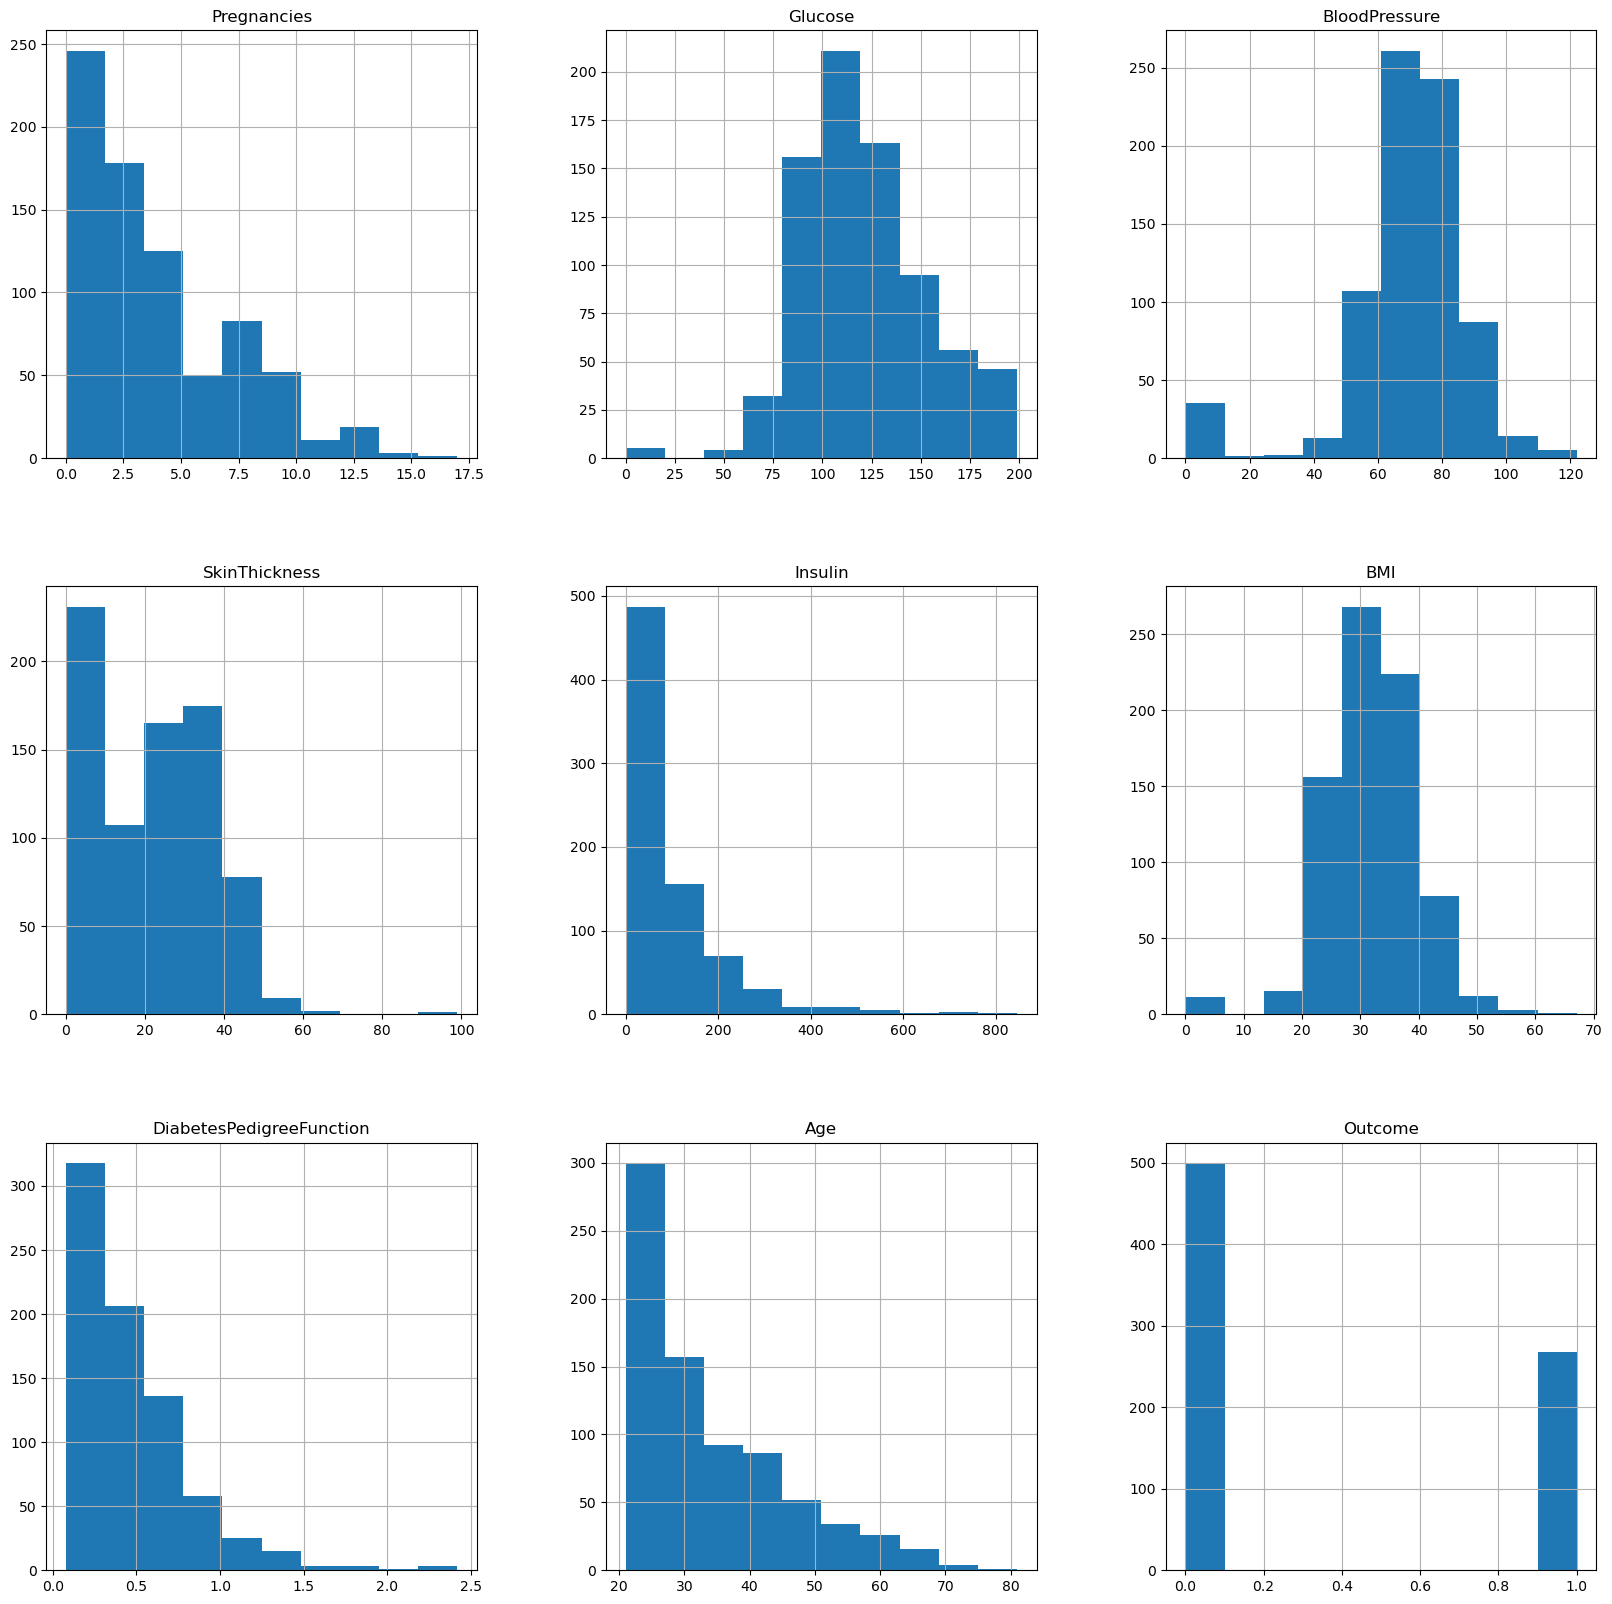

In [71]:
## Data visualization before removing any values 
p =data.hist(figsize = (20,20))

In [72]:
## Assumptions:
## Glucose, BloodP, SkinT, Insulin , BMI , PedigreeF and Age can not be zero
## Outcome is the target variable and it is categorical

In [73]:
###Finding Zeros
glu = (data['Glucose']==0).sum()
bp = (data['BloodPressure']==0).sum()
bmi = (data['BMI']==0).sum()
SkinT = (data['SkinThickness']==0).sum() 
Insulin = (data['Insulin']==0).sum() 
print(glu)
print(bp)
print(bmi)
print(SkinT)
print(Insulin)

5
35
11
227
374


In [74]:
data[data.DiabetesPedigreeFunction == 0].shape[0]

0

In [75]:
data[data.Age == 0].shape[0]

0

In [76]:
## Since  total rows of the original data set are 768, I will remove total of 44 rows (about 5%) where BMI or Blood P is equal to zero and 
## for the rows from Skin T and Insulin that are equal to zero  I will fill up with descriptive analyitics.


In [77]:
df1 = data.drop(data[data['BloodPressure'] == 0].index)
df1.shape

(733, 9)

In [78]:
df2 = df1.drop(df1[df1['BMI'] == 0].index)
df2.shape

(729, 9)

In [79]:
df3 = df2.drop(df2[df2['Glucose'] == 0].index)
df3.shape

(724, 9)

In [80]:
## Describe before removing rows
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [81]:
##Describe after removing rows
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


# Part II : Preprocessing & Feature Engineering

In [82]:
## Looking for outliers / Boxplot
## From describe above if Max > mean and median we can sense the prsence of Outliers
## "Insulin" has a high standard deviation, the quartile values are large, there is  outlier
## For better observation:


In [83]:
def boxplot(column):
    sns.boxplot(data=df3,x=df3[f"{column}"])
    plt.title(f"Boxplot of Diabetes {column}")
    plt.show()

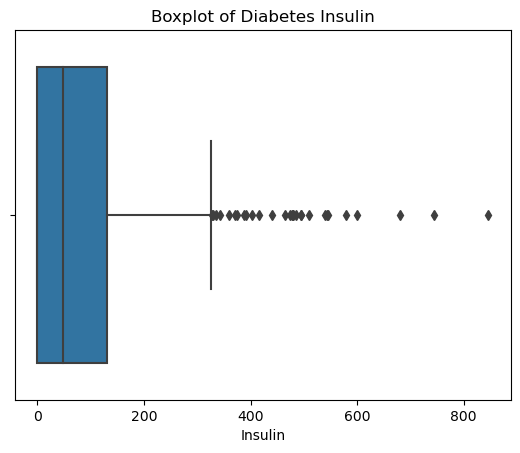

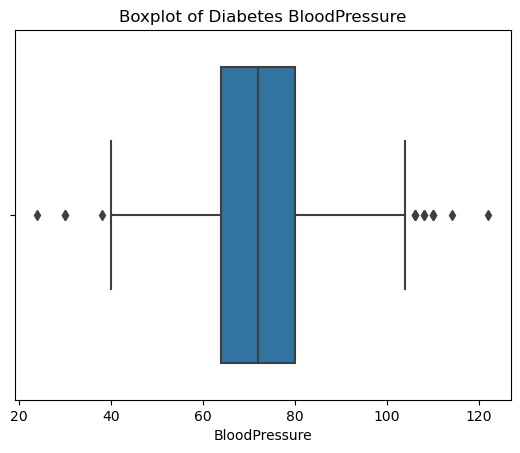

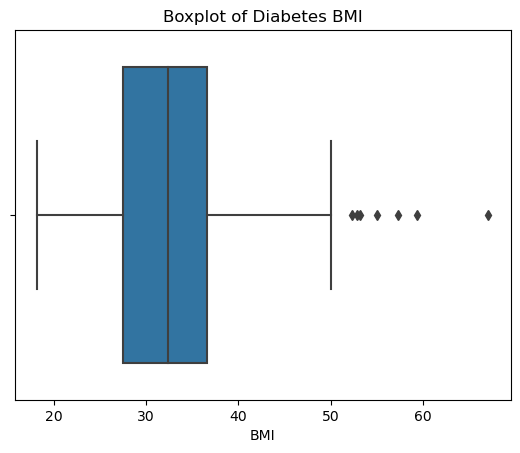

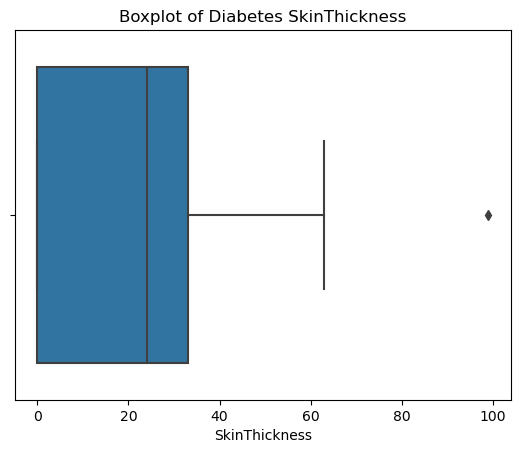

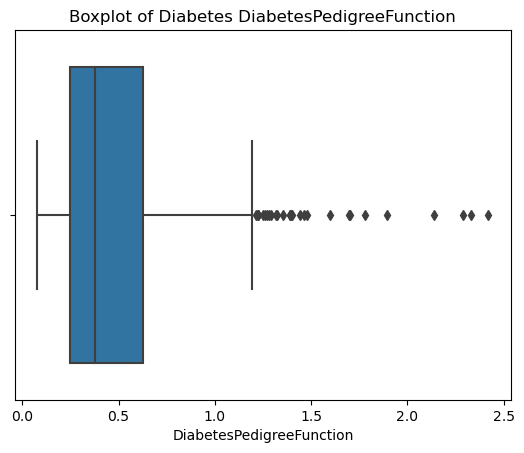

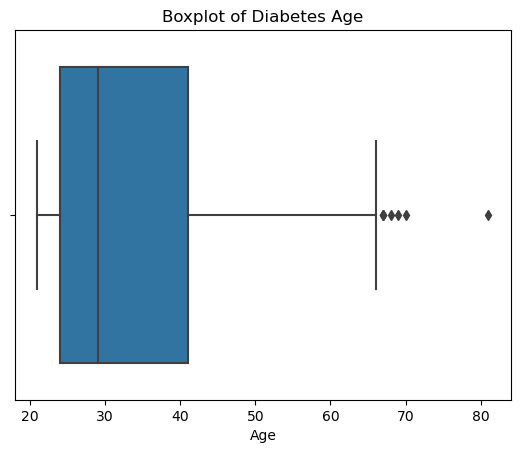

In [84]:
boxplot('Insulin')
boxplot('BloodPressure')
boxplot('BMI')
boxplot('SkinThickness')
boxplot('DiabetesPedigreeFunction')
boxplot('Age')

In [85]:
## Replacing zeros with median for Insulin and SkinThickness. Using median instead of mean to reduce the impact of outliers.


In [86]:
Insulin_Median = df3[df3['Insulin']>0]['Insulin'].median()
Insulin_Median

125.5

In [87]:
SckinT_Median = df3[df3['SkinThickness']>0]['SkinThickness'].median()
SckinT_Median

29.0

In [88]:
df4 = df3
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


In [89]:
df4['Insulin']=df4['Insulin'].replace(0,df4[df4['Insulin']>0]['Insulin'].median())
df4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125.5,33.6,0.627,50,1
1,1,85,66,29,125.5,26.6,0.351,31,0
2,8,183,64,0,125.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,125.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,125.5,30.1,0.349,47,1


In [90]:
df4['SkinThickness']=df4['SkinThickness'].replace(0,df4[df4['SkinThickness']>0]['SkinThickness'].median())
df4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125.5,33.6,0.627,50,1
1,1,85,66,29,125.5,26.6,0.351,31,0
2,8,183,64,29,125.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,125.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,29,125.5,30.1,0.349,47,1


In [91]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,29.133978,9.019267,7.000,25.000,29.000,33.0000,99.00
Insulin,724.0,142.044199,88.713438,14.000,118.250,125.500,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


<Axes: xlabel='Insulin'>

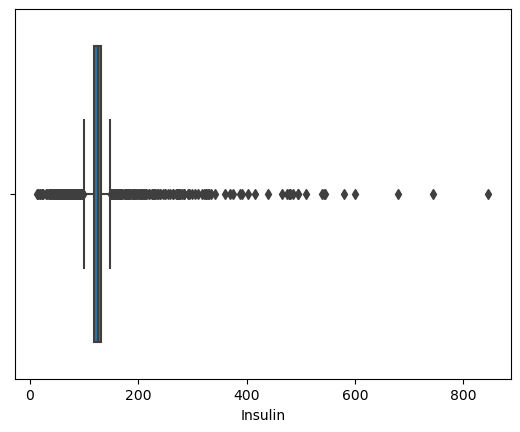

In [92]:
##Outliers
sns.boxplot(x = df4["Insulin"])

In [93]:
Q1 = df4.Insulin.quantile(0.25)
Q3 = df4.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df4.loc[df4["Insulin"] > upper,"Insulin"] = upper

<Axes: xlabel='Insulin'>

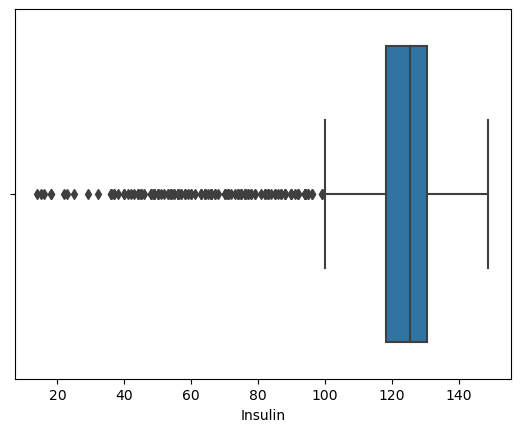

In [94]:
sns.boxplot(x = df4["Insulin"])

In [95]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.000
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.000
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.000
SkinThickness,724.0,29.133978,9.019267,7.000,25.000,29.000,33.0000,99.000
Insulin,724.0,118.092023,30.096526,14.000,118.250,125.500,130.5000,148.875
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.100
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.420
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.000
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.000


<Axes: xlabel='BMI', ylabel='Density'>

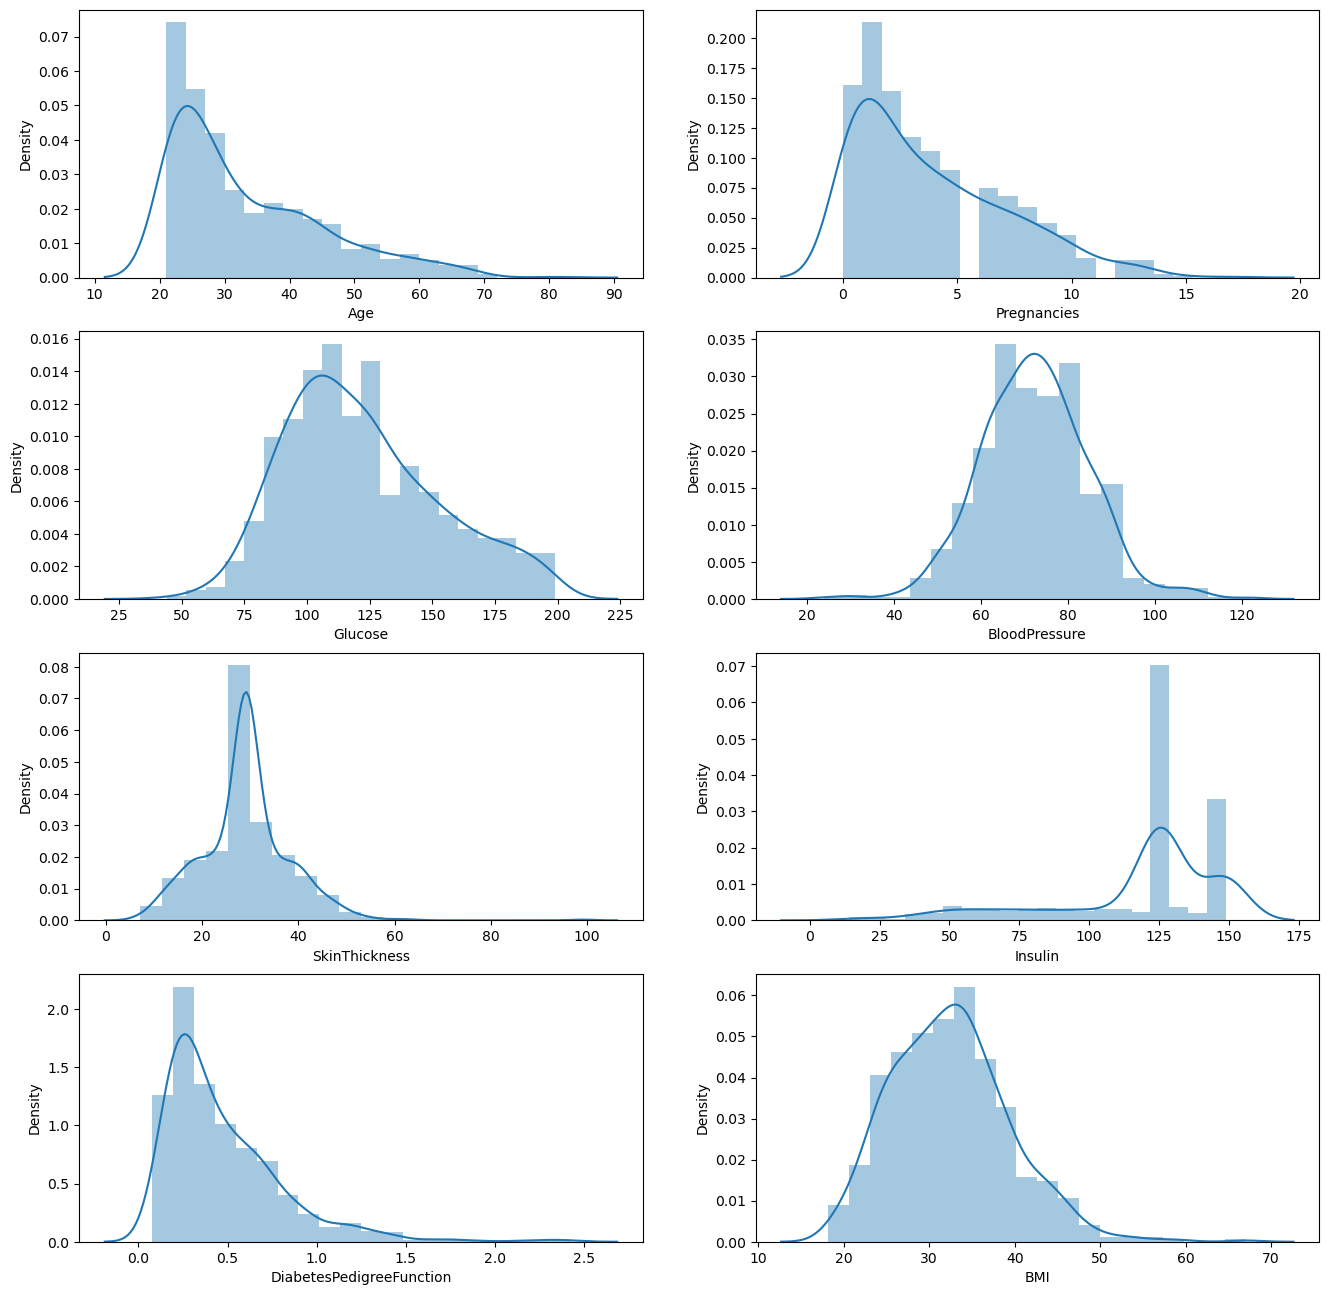

In [96]:
## Distributions per variables
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df4.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df4.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df4.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df4.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df4.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df4.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df4.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df4.BMI, bins = 20, ax=ax[3,1]) 

In [97]:
##Seraching for correlation. 
df4.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,0.078710,0.141974,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.195340,0.418537,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.191570,0.127238,0.287403,-0.000075,0.324897,0.166703
SkinThickness,0.078710,0.195340,0.191570,1.000000,0.168559,0.555098,0.106670,0.124268,0.216357
Insulin,0.141974,0.418537,0.127238,0.168559,1.000000,0.168245,0.050848,0.213458,0.272683
BMI,0.012342,0.223276,0.287403,0.555098,0.168245,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.106670,0.050848,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,0.124268,0.213458,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.216357,0.272683,0.299375,0.184947,0.245741,1.000000


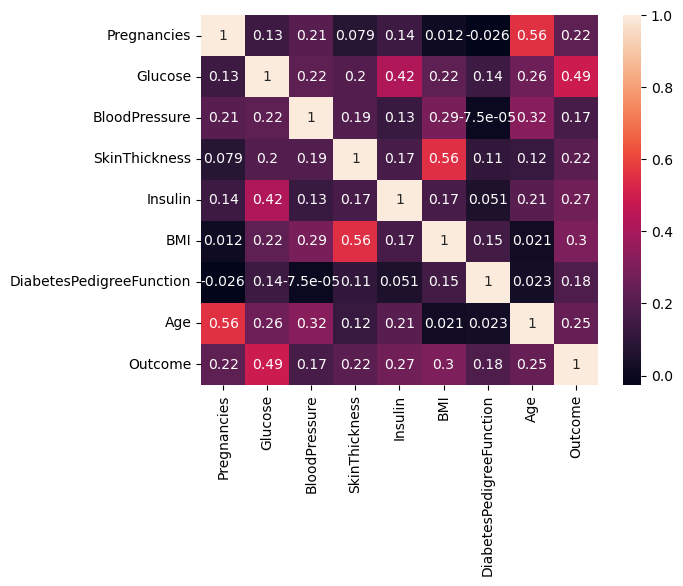

In [98]:
corr_matrix = df4.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [99]:
df4.corr()['Outcome']

Pregnancies                 0.224417
Glucose                     0.488384
BloodPressure               0.166703
SkinThickness               0.216357
Insulin                     0.272683
BMI                         0.299375
DiabetesPedigreeFunction    0.184947
Age                         0.245741
Outcome                     1.000000
Name: Outcome, dtype: float64

<Axes: xlabel='Glucose', ylabel='Outcome'>

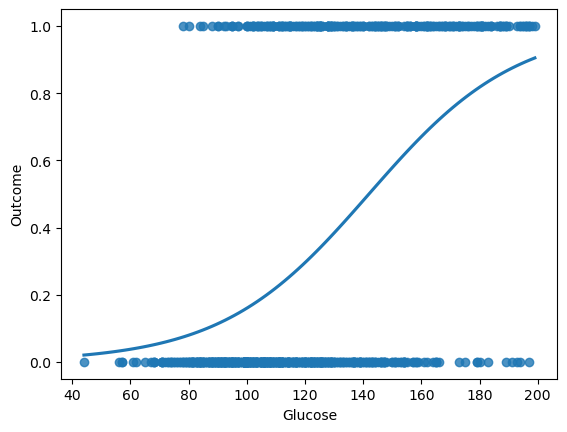

In [100]:
sns.regplot(x='Glucose', y = 'Outcome', data = df4,  logistic= True, ci = None)

In [101]:
## The closer the number is to 1 or (-1) the stronger the correlation. Base on this,  for this model  I will use the glucose and the outcome columns.


In [102]:
##Checking how well the outcome column is balanced
## % distribution of the Outcome 1 vs 0
df4["Outcome"].value_counts()*100/len(df4)

0    65.607735
1    34.392265
Name: Outcome, dtype: float64

In [103]:
df4["Outcome"].value_counts()

0    475
1    249
Name: Outcome, dtype: int64

In [104]:
### Scaling the Data
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125.500,33.6,0.627,50,1
1,1,85,66,29,125.500,26.6,0.351,31,0
2,8,183,64,29,125.500,23.3,0.672,32,1
3,1,89,66,23,94.000,28.1,0.167,21,0
4,0,137,40,35,148.875,43.1,2.288,33,1


In [105]:
df5 = df4

In [106]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df5.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.635022,0.849933,-0.032378,0.650838,0.246311,0.164562,0.458421,1.416075
1,-0.852861,-1.200262,-0.517370,-0.014865,0.246311,-0.852262,-0.372691,-0.199947
2,1.230175,1.988930,-0.679035,-0.014865,0.246311,-1.331622,0.593928,-0.114893
3,-0.852861,-1.070091,-0.517370,-0.680567,-0.801045,-0.634371,-0.926765,-1.050485
4,-1.150438,0.491962,-2.619006,0.650838,1.023515,1.544537,5.460146,-0.029839


# Part III : Training ML Model

In [107]:
### Model Building Using Glucose to predict Outcome
### Splitting the datset
X = df5.drop(['Outcome','Pregnancies','BloodPressure', 'SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], axis=1)
y = df5['Outcome']

In [108]:
###Now we will split the data into training and testing data using the train_test_split function
###from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=26)

In [109]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((485, 1), (239, 1))

Random Forest

In [110]:
###Random Forest
##Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=26)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_estimators=200, random_state=26)

In [111]:
##Now after building the model, check the accuracy of the model on the training dataset
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.7855670103092783


In [112]:
##Getting the accuracy score for Random Forest

from sklearn import metrics
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7238493723849372


In [113]:
###Classification report and confusion matrix of random forest model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[124  29]
 [ 37  49]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       153
           1       0.63      0.57      0.60        86

    accuracy                           0.72       239
   macro avg       0.70      0.69      0.69       239
weighted avg       0.72      0.72      0.72       239



In [114]:
## Random Forest Model Notes: 
# The model was tried with different depths and n values 
# changing the depth to 7 improved the accuracy of the model

Decision Tree

In [115]:
### DecisionTree Model
from sklearn.tree import DecisionTreeClassifier

In [116]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
##Getting the accuracy score for Decision Tree

from sklearn import metrics

predictions2 = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions2)))

Accuracy Score = 0.7280334728033473


In [118]:
##Classification report and confusion matrix of the decision tree model

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test,predictions2))

[[130  23]
 [ 42  44]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       153
           1       0.66      0.51      0.58        86

    accuracy                           0.73       239
   macro avg       0.71      0.68      0.69       239
weighted avg       0.72      0.73      0.72       239



Support Vector (SVM)

In [119]:
##Support Vector Machine (SVM) Model

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [120]:
##Prediction from support vector machine model on the testing data

svc_pred = svc_model.predict(X_test)

In [121]:
##Accuracy score for SVM

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7698744769874477


In [122]:
##Classification report and confusion matrix of the SVM classifier

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[135  18]
 [ 37  49]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       153
           1       0.73      0.57      0.64        86

    accuracy                           0.77       239
   macro avg       0.76      0.73      0.74       239
weighted avg       0.77      0.77      0.76       239



Random Forest Features

In [123]:
##Getting feature importances for Random Forest and creating visualization 

rfc.feature_importances_

array([1.])

<Axes: >

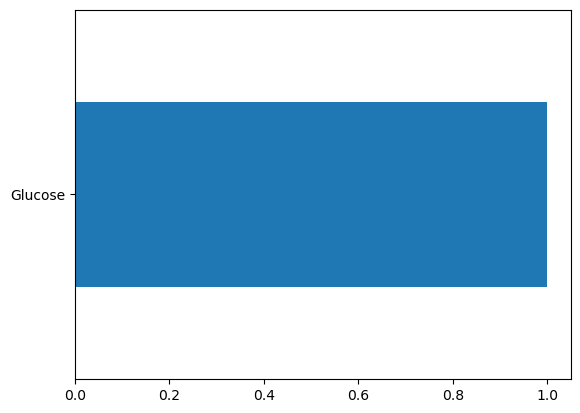

In [124]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

Logistic Regression Model

In [125]:
###Logistic Regression Model

y= df5['Outcome'] 
x= df5.drop(['Outcome','Pregnancies','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], axis=1)

# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.33)

In [127]:
###Implementing Logistic Regression using sklearn
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [128]:
##Print coefficients
print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-5.20748536]
The coefficient b1=  [[0.03564568]]


In [129]:
###Make prediction for the test data
y_pred= modelLogistic.predict(x_test)

In [130]:
##Confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[136  10]
 [ 47  46]]


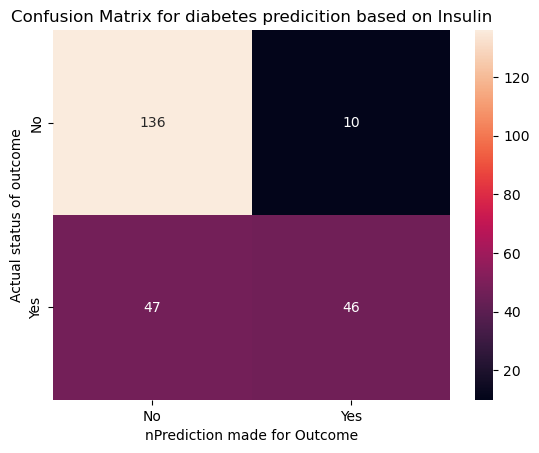

In [140]:
ax = sns.heatmap(ConfusionMatrix, annot=True, fmt='g')
ax.set_title("Confusion Matrix for diabetes predicition based on Insulin");
ax.set_xlabel("nPrediction made for Outcome")
ax.set_ylabel("Actual status of outcome");
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(["No","Yes"])
ax.yaxis.set_ticklabels(["No","Yes"])
plt.show()

In [132]:
## Accuracy rate
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.7615062761506276


In [141]:
##Classification report and confusion matrix of the SVM classifier

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[136  10]
 [ 47  46]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       146
           1       0.82      0.49      0.62        93

    accuracy                           0.76       239
   macro avg       0.78      0.71      0.72       239
weighted avg       0.77      0.76      0.75       239



# Part IV : Conclusion

In [ ]:
## Despite trying different 'n' and depth values and % of split data; The four supervised models used in this project, presented a similar output.
## SVM being the one with sligthy higher accuarcy. Accuracy values next:
## .77 SVM
## .76 Logistic Regression
## .73 Decision Tree
## .72 Random Forest

## For future analysis more features can be added to the models.